In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

# Evolution of the maximum RMS velocity in the convection zone in F4, F5, and F13

In [2]:
import utils
from ppm import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

cases = []
yprof_paths = {}
yprofs = {}
dump_A = {}
dump_B = {}
res = {}

cases.append('F4')
yprof_paths[cases[-1]] = '/rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4'
dump_A[cases[-1]] = 0
dump_B[cases[-1]] = 1959

cases.append('F5')
yprof_paths[cases[-1]] = '/rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F5'
dump_A[cases[-1]] = 0
dump_B[cases[-1]] = 1169

cases.append('F13')
yprof_paths[cases[-1]] = '/rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F13'
dump_A[cases[-1]] = 1
dump_B[cases[-1]] = 872

for this_case in cases:
    yprofs[this_case] = yprofile(yprof_paths[this_case])
    r = yprofs[this_case].get('Y', fname=0, resolution='l')
    res[this_case] = 2*len(r)

/usr/local/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Reading attributes from file  YProfile-01-1959.bobaaa
Analyzing headers ...
There are 1960 YProfile files in the /rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4 directory.
Ndump values range from 0 to 1959
Time values range from 86.5493 to 162264.0
Reading attributes from file  YProfile-01-1169.bobaaa
Analyzing headers ...
There are 1170 YProfile files in the /rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F5 directory.
Ndump values range from 0 to 1169
Time values range from 86.5493 to 101263.0
Reading attributes from file  YProfile-01-0872.bobaaa
Analyzing headers ...
There are 872 YProfile files in the /rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F13 directory.
Ndump values range from 1 to 872
Time values range from 346.197 to 301884.0
NDump 0 Does not exist in this directory
Reselecting NDump as the largest in the Directory
Which is 872


In [3]:
def get_v_max_evolution(prof, cycles, r1, r2):
    r = prof.get('Y', fname = cycles[0], resolution = 'l')
    idx1 = np.argmin(np.abs(r - r1))
    idx2 = np.argmin(np.abs(r - r2))

    t = np.zeros(len(cycles))
    v_max = np.zeros(len(cycles))
    for k in range(len(cycles)):
        t[k] = prof.get('t', fname = cycles[k], resolution = 'l')[-1]
        v_rms  = (2.*prof.get('Ek', fname = cycles[k], resolution = 'l'))**0.5
        v_max[k] = np.max(v_rms[idx2:idx1])
    
    return t, v_max

In [4]:
sparse = 1

dumps = {}
nd = {}
t = {}
v_max = {}

for this_case in cases:
    print 'Processing {:s}...'.format(this_case)
    dumps[this_case] = range(dump_A[this_case], dump_B[this_case] + 1, sparse)
    nd[this_case] = len(dumps[this_case])
    t[this_case] = np.zeros(nd[this_case])
    v_max[this_case] = np.zeros(nd[this_case])
    
    t[this_case], \
    v_max[this_case] = get_v_max_evolution(yprofs[this_case], dumps[this_case], \
                                           11.5, 28.5)

Processing F4...
Processing F5...
Processing F13...


<IPython.core.display.Javascript object>


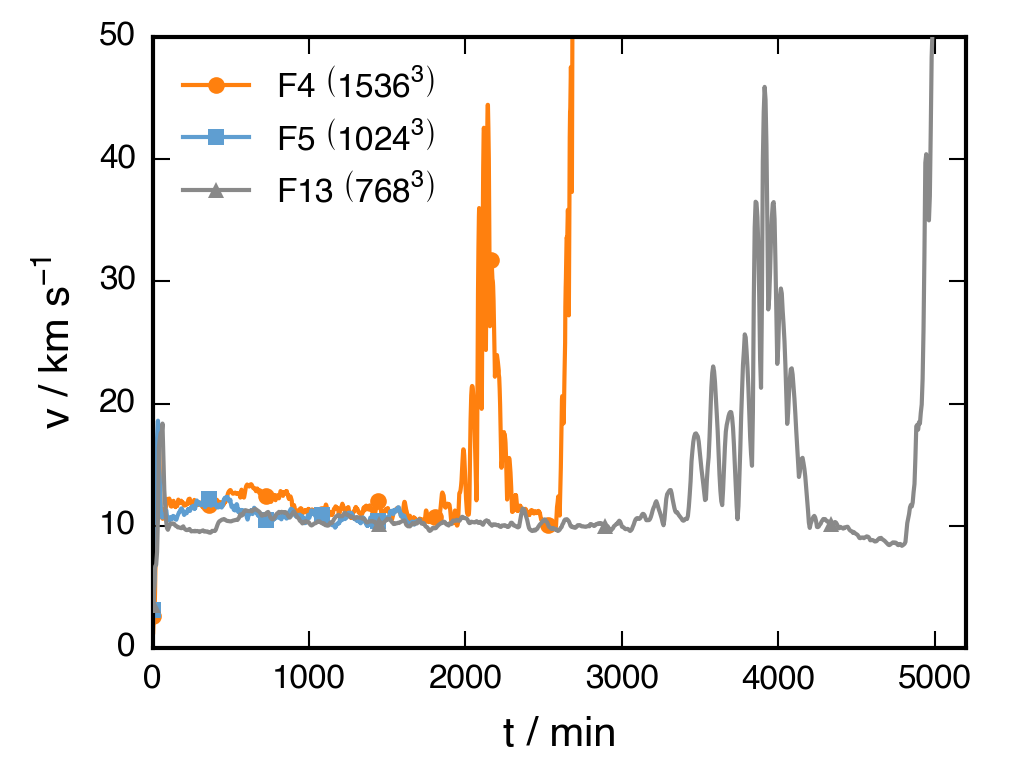

<IPython.core.display.Javascript object>


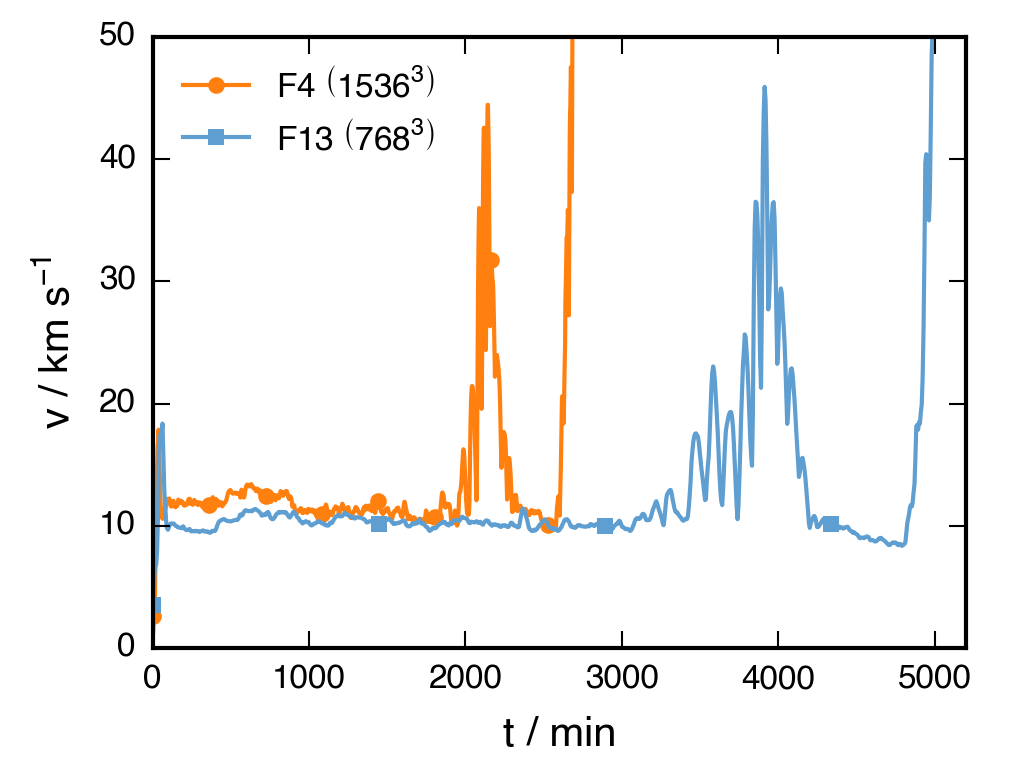

In [9]:
cb = utils.colourblind
color = [cb(1), cb(3), cb(9)]
zorder = [1, 2, 3]
marker = ['o', 's', '^']

ifig = 1; plt.close(ifig); plt.figure(ifig)
k = 0
for this_case in cases:
    lbl = r'{:s} $\left({:d}^3\right)$'.format(this_case, res[this_case])
    plt.plot(t[this_case]/60., 1e3*v_max[this_case], color=color[k], \
             marker=marker[k], markevery=250/sparse, zorder=zorder[k], \
             label=lbl)
    k += 1
    
plt.xlim((0., 5.2e3))
plt.ylim((0., 50.))
plt.xlabel('t / min')
plt.ylabel(r'v / km s$^{-1}$')
plt.legend(loc=0)
plt.savefig('v_evolution_F4_F5_F13.pdf')

ifig = 2; plt.close(ifig); plt.figure(ifig)
k = 0
for this_case in ['F4', 'F13']:
    lbl = r'{:s} $\left({:d}^3\right)$'.format(this_case, res[this_case])
    plt.plot(t[this_case]/60., 1e3*v_max[this_case], color=color[k], \
             marker=marker[k], markevery=250/sparse, zorder=zorder[k], \
             label=lbl)
    k += 1
    
plt.xlim((0., 5.2e3))
plt.ylim((0., 50.))
plt.xlabel('t / min')
plt.ylabel(r'v / km s$^{-1}$')
plt.legend(loc=0)
plt.savefig('v_evolution_F4_F13.pdf')